
#### 1. Introduction to Logistic Regression
- **What is Logistic Regression?**  
  A statistical model used for binary classification, predicting the probability of an outcome using a logistic function (sigmoid). Extendable to multiclass problems.
- **Use Cases**: Spam detection, medical diagnosis, customer churn prediction.
- **Assumptions**:  
  - Binary/multinomial outcome.  
  - Independence of observations.  
  - Minimal multicollinearity.  
  - Large sample size (for stable estimates).

#### 2. Mathematical Foundations
- **Logistic Function**:  
  $
  \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
  $
- **Log-Loss (Cross-Entropy)**:  
  $
  J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
  $
- **Optimization**: Gradient descent or Newton-Raphson to minimize log-loss.

#### 3. Model Training and Evaluation
- **Data Splitting**: Train/test sets to evaluate generalization.
- **Evaluation Metrics**:  
  - Accuracy, Precision, Recall, F1-Score.  
  - ROC-AUC, Confusion Matrix.  

#### 4. Multiclass Logistic Regression
- **One-vs-Rest (OvR)**: Train a binary classifier for each class.  
- **Softmax Regression**: Directly model multiclass probabilities:  
  $
  P(y=k) = \frac{e^{\beta_k x}}{\sum_{j=1}^K e^{\beta_j x}}
  $

#### 5. Regularization
- **L1 (Lasso)**: Penalizes absolute coefficients (sparse models).  
- **L2 (Ridge)**: Penalizes squared coefficients (prevents overfitting).  
- **Hyperparameter `C`**: Inverse of regularization strength (`C=1/λ`).


Logistic classification is most commonly associated with **logistic regression**, a statistical method used for predicting binary outcomes. However, logistic models come in several types depending on the nature of the dependent variable and the structure of the problem. Below, we detail the main types and then outline some best practices when using logistic classification.

---

## Types of Logistic Classification

1. **Binary Logistic Regression**  
   - **Use Case:** When the outcome is binary (e.g., yes/no, success/failure, 1/0).  
   - **Example:** Predicting whether an email is spam or not.

2. **Multinomial Logistic Regression**  
   - **Use Case:** When the dependent variable has more than two categories without any inherent order.  
   - **Example:** Classifying the type of fruit (apple, orange, banana) based on features.

3. **Ordinal Logistic Regression (Proportional Odds Model)**  
   - **Use Case:** When the dependent variable has more than two categories with a natural order (e.g., low, medium, high).  
   - **Example:** Predicting customer satisfaction levels on a scale (dissatisfied, neutral, satisfied).

4. **Conditional Logistic Regression**  
   - **Use Case:** Often used in matched case-control studies where data are stratified or clustered.  
   - **Example:** Analyzing medical studies where cases and controls are matched on several characteristics.

---

## Best Practices for Logistic Classification

### 1. **Data Preparation and Exploration**

- **Data Cleaning:**  
  - Handle missing values appropriately (imputation or removal).  
  - Detect and address outliers if they might unduly influence the model.

- **Feature Engineering:**  
  - Create meaningful features that capture the underlying patterns.  
  - Consider transformations (e.g., log, square root) if relationships are non-linear.

- **Exploratory Data Analysis (EDA):**  
  - Visualize data distributions and relationships between predictors and the outcome.  
  - Use correlation matrices to understand multicollinearity among features.

### 2. **Feature Scaling and Encoding**

- **Scaling:**  
  - While logistic regression does not require scaling for the model to run, scaling features (e.g., standardization or normalization) can help when using regularization techniques or when features are measured on very different scales.

- **Encoding Categorical Variables:**  
  - Use techniques like one-hot encoding for nominal variables.  
  - For ordinal variables, consider using label encoding if the order matters.

### 3. **Model Specification and Regularization**

- **Selecting the Right Model:**  
  - Choose binary, multinomial, or ordinal logistic regression based on your outcome variable.

- **Regularization:**  
  - Apply regularization (L1, L2, or elastic net) to avoid overfitting, especially when you have many predictors or when predictors are highly correlated.  
  - Use cross-validation to select the regularization parameter.

### 4. **Model Fitting and Evaluation**

- **Train-Test Split:**  
  - Split your data into training and test sets to evaluate the model's generalization performance.
  
- **Cross-Validation:**  
  - Use k-fold cross-validation to ensure that your model performs well across different subsets of the data.

- **Performance Metrics:**  
  - For binary outcomes, use metrics such as accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices.
  - For multinomial or ordinal outcomes, consider metrics like overall accuracy, per-class precision/recall, and multiclass ROC analysis.

- **Assumption Checks:**  
  - Check for linearity in the log-odds for continuous predictors.
  - Look at variance inflation factors (VIF) to assess multicollinearity.
  - Validate the proportional odds assumption in ordinal logistic regression.

### 5. **Interpretability and Diagnostics**

- **Coefficient Interpretation:**  
  - Interpret the model coefficients in terms of odds ratios to explain how a unit change in a predictor affects the odds of the outcome.

- **Residual Analysis and Diagnostics:**  
  - Analyze residuals and influence diagnostics (e.g., Cook’s distance) to detect any observations that disproportionately influence the model.
  - Use goodness-of-fit tests such as the Hosmer-Lemeshow test for binary logistic regression.

### 6. **Reporting and Deployment**

- **Documentation:**  
  - Clearly document model assumptions, data preparation steps, and any transformations applied.
  
- **Model Updating:**  
  - In production, plan for model monitoring and periodic retraining as new data becomes available.

- **Interpretability for Stakeholders:**  
  - Provide visualizations and clear explanations of model outputs, especially if the model is used in a decision-making context.

---

By carefully selecting the appropriate type of logistic regression and following these best practices, you can build robust models that not only perform well on your data but are also interpretable and reliable in real-world applications.

"One vs. Rest" (OvR), also known as "One vs. All," is a strategy used for extending binary classifiers—like logistic regression—to multiclass classification problems. Here's an in-depth look at how OvR works, its advantages, potential drawbacks, and best practices when using it:

---

## What is One vs. Rest?

- **Concept:**  
  Instead of building a single model that distinguishes among all classes simultaneously (as in multinomial logistic regression), OvR constructs one binary classifier per class. Each classifier is trained to distinguish one class (the positive class) from all the others (the negative class).

- **Training Process:**  
  - Suppose you have \(K\) classes. You train \(K\) separate binary classifiers.
  - For the \(i\)-th classifier, label the samples of class \(i\) as positive (1) and all other samples as negative (0).
  - At prediction time, you run all \(K\) classifiers and then typically choose the class with the highest predicted probability (or confidence score).

- **Example:**  
  For a classification problem with three classes (A, B, and C), you would create three logistic regression models:
  1. Model 1: Class A vs. Classes B and C.
  2. Model 2: Class B vs. Classes A and C.
  3. Model 3: Class C vs. Classes A and B.
  
  When a new sample is introduced, each model outputs a probability indicating how likely it is that the sample belongs to its respective positive class. The class associated with the highest probability is chosen as the predicted class.

---

## Advantages of One vs. Rest

1. **Simplicity:**  
   - OvR is straightforward to implement and understand, especially when starting with binary classification methods.

2. **Flexibility:**  
   - You can use any binary classifier (not just logistic regression) in the OvR scheme.
   - It can be beneficial if you have highly imbalanced classes since each binary model focuses on separating one class from the rest.

3. **Scalability:**  
   - For problems with a large number of classes, each individual binary classifier might be simpler and faster to train than a single, complex multiclass classifier.

---

## Potential Drawbacks of One vs. Rest

1. **Imbalanced Data:**  
   - In each binary classifier, the "rest" class may dominate if one class is significantly smaller than the combined other classes. This imbalance might require additional techniques (e.g., class weighting, resampling) to mitigate.

2. **Probability Calibration:**  
   - The output probabilities from different binary classifiers might not be directly comparable. It can sometimes be challenging to interpret the absolute probability values when using them to make final decisions.

3. **Independence Assumption:**  
   - Since each binary classifier is trained independently, OvR might ignore relationships between classes that could be captured by a multinomial model which considers all classes simultaneously.

---

## Best Practices for Using One vs. Rest

1. **Handling Imbalanced Classes:**
   - **Class Weighting:** Adjust the weights of classes during training so that the minority class gets appropriately emphasized.
   - **Resampling Techniques:** Consider over-sampling the minority class or under-sampling the majority class for each binary classifier.

2. **Probability Calibration:**
   - Use calibration techniques such as Platt scaling or isotonic regression if you need well-calibrated probabilities from each classifier.
   - Alternatively, normalize the output probabilities across all classifiers to make them more comparable.

3. **Evaluation Metrics:**
   - Use evaluation metrics that reflect the multiclass nature of the problem, such as overall accuracy, precision, recall, F1-score (macro/micro), and confusion matrices.
   - Evaluate each binary classifier individually to ensure that none is underperforming or overly biased due to class imbalance.

4. **Model Comparisons:**
   - Compare the performance of the OvR approach with other multiclass methods such as multinomial logistic regression (softmax regression) or one-vs-one strategies.
   - Choose the method that best fits the data characteristics and problem requirements.

5. **Threshold Optimization:**
   - Experiment with decision thresholds beyond the default 0.5 probability cutoff for each classifier. This can be particularly useful when class distributions are skewed.

6. **Cross-Validation:**
   - Use k-fold cross-validation to ensure that your OvR classifiers generalize well across different subsets of data. This is especially important if individual classes are rare.

---

## When to Use One vs. Rest

- **When It Works Well:**
  - When you have a manageable number of classes.
  - When classes are relatively balanced or when you can effectively address imbalances.
  - When you want to leverage the simplicity and interpretability of binary classifiers.

- **When to Consider Alternatives:**
  - If you have a large number of classes and interactions between classes are important, a multinomial logistic regression model or one-vs-one approach might be more suitable.
  - When probability estimates need to be directly comparable across classes, consider using methods specifically designed for multiclass probability estimation.

---


Accuracy: 0.7865168539325843
ROC AUC: 0.8527456455258609
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       109
           1       0.71      0.75      0.73        69

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



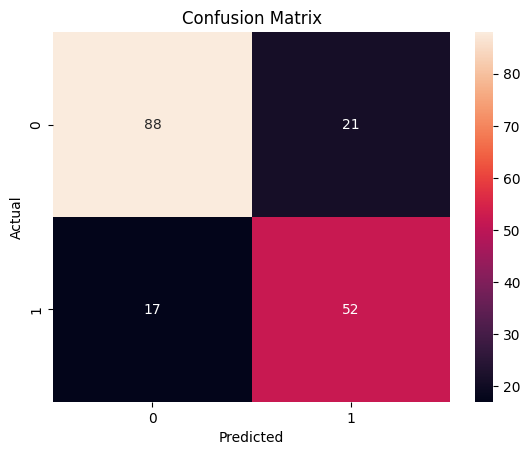

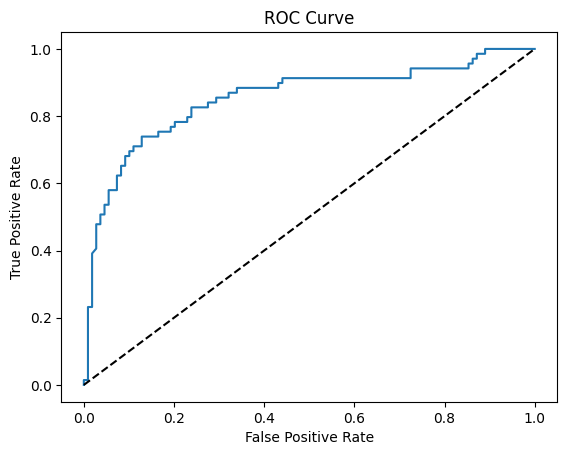

            feature  coefficient
7   cat__sex_female     1.411570
4     cat__pclass_1     1.043385
9   cat__embarked_C     0.268153
5     cat__pclass_2     0.189613
10  cat__embarked_Q     0.153457
3         num__fare     0.121179
2        num__parch    -0.056720
11  cat__embarked_S    -0.271048
1        num__sibsp    -0.438509
0          num__age    -0.549758
6     cat__pclass_3    -1.082436
8     cat__sex_male    -1.261009


In [16]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, roc_curve)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load Data
titanic = sns.load_dataset('titanic')

# Preprocessing
titanic_clean = titanic.drop(columns=['deck', 'embark_town', 'alive', 'alone', 'adult_male'])
titanic_clean = titanic_clean.dropna(subset=['embarked'])

# Define Features and Target
X = titanic_clean[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = titanic_clean['survived']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
numeric_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Model Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42))
])

# Train Model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Feature Coefficients
coefs = model.named_steps['classifier'].coef_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefs[0]})
print(coef_df.sort_values(by='coefficient', ascending=False))

In [17]:
import seaborn as sns

df=sns.load_dataset('titanic')
df.drop(columns=["deck","embark_town","alive","embark_town"],inplace=True)
df.dropna(subset=['embarked'],inplace=True)
df['age']=df['age'].fillna(df['age'].median())


In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
X=df.drop(columns=['survived'],axis=1).copy(deep=True)
y=df['survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)


Model Accuracy: 0.8146067415730337


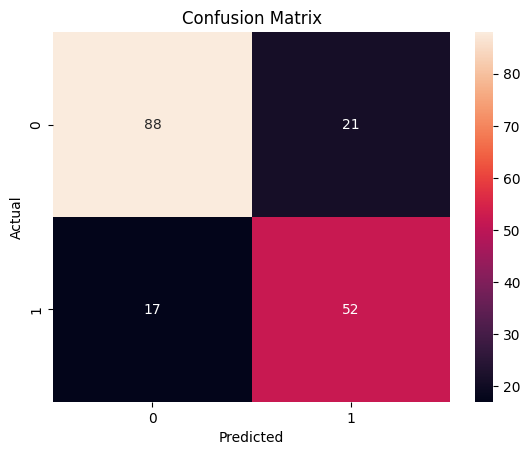

In [22]:

print("Model Accuracy:", model.score(X_test, y_test))
from  sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
